Consider two lists of patients’ metabolic values, e.g.,:

Albumine = [ ("P1", 3.4), ("P2", 4.9), ("P3", 3.8)]

Calcium = [ ("P2", 9.0), ("P3", 8.5), ("P4", 11.0), ("P5", 12.7) ]

Write a Python code that achieves the same result as a FULL OUTER JOIN operation on the two lists, using the first element of the pairs as join key. The result, in the considered example, should be a new list, such that:

[('P1', 3.4, None), ('P2', 4.9, 9.0), ('P3', 3.8, 8.5), ('P4', None, 11.0), ('P5', None, 12.7)]

Hint: as an intermediate data representation, it may be convenient to represent the lists as dictionaries.


In [139]:
from PIL.features import check
from fontTools.misc.plistlib import end_key

albumine = [ ("P1", 3.4), ("P2", 4.9), ("P3", 3.8)]
calcium = [ ("P2", 9.0), ("P3", 8.5), ("P4", 11.0), ("P5", 12.7) ]

alb={t[0]:t[1] for t in albumine}
cal={t[0]:t[1] for t in calcium}
keys= set(cal.keys()).union(alb.keys())
outpt= [(key,alb.get(key),cal.get(key) ) for key in keys]
print(outpt)


[('P1', 3.4, None), ('P2', 4.9, 9.0), ('P4', None, 11.0), ('P3', 3.8, 8.5), ('P5', None, 12.7)]


Epitopes are short amino acid sequences that are recognized by the immune system.

Write a Python function epitopes_by_aminoacid that receives as input a list of epitopes (e.g., ["KLPDD","KIADY","ELLH","FELLHAPAT"], and returns a dictionary whose keys are all the amino acids found in the epitopes of the list.

For each key (i.e., amino acid), the corresponding value is a list of all the epitopes that contain the amino acid indicated by the key.
The lists in the dictionary are sorted in alphabetical order. See the output for the indicated example on the right.

In [168]:
epitopes=["KLPDD","KIADY","ELLH","FELLHAPAT"]
def epitopes_by_aminoacid(epitopes):
   aa=set(''.join(epitopes))
   diction={}
   for a in aa:
       diction[a]=[]
       for epi in epitopes:
           if a in epi:
               diction[a].append(epi)
   return diction


epitopes_by_aminoacid(epitopes)


{'K': ['KLPDD', 'KIADY'],
 'F': ['FELLHAPAT'],
 'I': ['KIADY'],
 'H': ['ELLH', 'FELLHAPAT'],
 'L': ['KLPDD', 'ELLH', 'FELLHAPAT'],
 'E': ['ELLH', 'FELLHAPAT'],
 'D': ['KLPDD', 'KIADY'],
 'T': ['FELLHAPAT'],
 'P': ['KLPDD', 'FELLHAPAT'],
 'A': ['KIADY', 'FELLHAPAT'],
 'Y': ['KIADY']}

 Using the output of Ex 3, build a barplot that counts how many amino acids appear, respectively, in 1, 2, 3, ... epitopes. That is: the x-axis contains the sorted lengths of the lists of epitopes and the y-axis contains the number of amino acids corresponding to lists of such length.


[1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3] [4, 6, 1]
[1, 2, 3] [4, 6, 1]


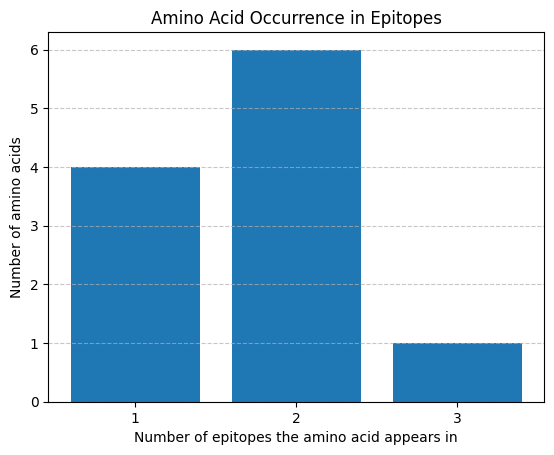

In [207]:
import matplotlib.pyplot as plt
epitope_dictionary= epitopes_by_aminoacid(epitopes)
x = sorted([len(vl) for vl in epitope_dictionary.values()])
y= [x.count(n) for n in set(x)]
print(x,y)
x=list(set(x))
print(x,y)
plt.bar (x,y)
plt.xlabel('Number of epitopes the amino acid appears in')
plt.ylabel('Number of amino acids')
plt.title('Amino Acid Occurrence in Epitopes')
plt.xticks(x)  # Ensure all x labels are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Build a function aminoacids_with_x_epitopes(x) that, taking as input a number x, returns the list of amino acids that appear in x epitopes. Solutions that use list comprehension are preferred [+1 pt].Build a function aminoacids_with_x_epitopes(x) that, taking as input a number x, returns the list of amino acids that appear in x epitopes. Solutions that use list comprehension are preferred [+1 pt].


In [269]:
def aminoacids_with_x_epitopes(x):
    aa_list = [ky for ky,vl in epitope_dictionary.items() if len(vl)==x]
    return aa_list
aminoacids_with_x_epitopes(2)


['K', 'H', 'E', 'D', 'P', 'A']

Implement the scenario described in Exercises 3, 4, and 5, using Python classes. Use all the information in the intro and previous exercises to
formulate a complete answer. You need one class for Sequence, only with letters and a memorized length; Epitopes are a specific type of Sequence,
with a length of maximum 20 amino acids. Epitopes not satisfying such requirement should raise an Exception on instance creation; the exception must
 be handled appropriately.

The Epitope class must implement two methods (diffs and common3) that allow to crosscheck two epitopes, specifically:

 • to return the amino acids that different in the two amino acids (i.e., contained in one but not in the other);

 • to check if the two epitopes hold at least three distinct amino acids in common.

Finally, add an example instantiation of two epitopes and call the diffs and common3 methods.

In [319]:
class invalid_length(Exception):
    pass

class sequence:
    def __init__(self,seq):
        self.sequence= seq
        self.length= len(seq)
    def __iter__(self):
        return iter(self.sequence)


class epitope(sequence):
    def __init__(self,seq):
        super().__init__(seq)
        try:
            self.check()
        except invalid_length as e:
            print('Error:', e)


    def check(self):
        if self.length>20:
            raise invalid_length('you should not have more than 20 amino acids')

    @staticmethod
    def diffs (seq1,seq2):
        seq1=set(seq1)
        seq2=set(seq2)
        differ=seq1.symmetric_difference(seq2)
        return differ

    @staticmethod
    def common3 (seq1,seq2):
        seq1=set(seq1)
        seq2=set(seq2)
        common=seq1.intersection(seq2)
        return True if len(common)>2 else False


seq1="FELLHAPAT"
#seq2="KIADY"
seq2="ELLH"
epi1=epitope(seq1)
epi2=epitope(seq2)
print(epitope.diffs(epi1,epi2))
epitope.common3(epi1,epi2)



{'F', 'T', 'A', 'P'}


True